In [1]:
import torch
from source.datasets.fast_datasets import *
from source.models_base.mb_vggish import MusicBertVGGish

BERT = MusicBertVGGish(name="test").cuda()
# BERT.load_pretrained()
BERT.load_model("models/music_bert_mlm_increased_masking.pth")
BERT.eval()

genre_dataset = GTZANFastDataset()

In [3]:
%matplotlib widget

from source.utils.plot_utils import visualize_vectors

visualize_vectors(BERT, genre_dataset)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

0.12964496
0.12491662
0.09233757
0.08564526
0.07158065
0.053951513
0.042955186
0.03548927
0.02420029
0.018629117
0.013991229
0.010240084
0.0046078973


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf

def numpy_to_TFFeature(item):
    
    if len(item.shape) == 0:
        item = np.array([item])
    
    if len(item.shape) != 1:
        tensor = tf.io.serialize_tensor(item)
        item = np.array([tensor.numpy()])
    
    if item.dtype == 'float64':
        value = tf.train.FloatList(value = item.astype(np.float64))
        return tf.train.Feature(float_list = value)
    elif item.dtype == 'int32':
        value = tf.train.Int64List(value = item)
        return tf.train.Feature(int64_list = value)
    else: # Only String type remains
        value = tf.train.BytesList(value = item)
        return tf.train.Feature(bytes_list = value)

def map_to_TFExample(obj):
    feat = {}
    
    for key, el in obj.items():
        feat[key] = numpy_to_TFFeature(el)
        
    features = tf.train.Features(feature = feat)
    example = tf.train.Example(features = features)
    return example


def build_TFExample(embeddings, label):
    
    ## embeddings is a 2D numpy matrix
    
    shape = embeddings.shape

In [5]:
import numpy as np


tab = np.load("data/GiantSteps/key_path.npy", allow_pickle=True)

len(tab)

604

In [41]:
from source.datasets.sound_transforms import log_mel_spectrogram
import librosa

x, sr = librosa.load(tab[0]['path'], sr=None)
features = log_mel_spectrogram(x,sr)

tab[0]

{'class': 'D:major',
 'path': '../git/giantsteps-key-dataset/audio/10089.LOFI.wav'}

In [29]:
compress = features.tobytes()

value = tf.train.BytesList(value = [compress])
feature = tf.train.Feature(bytes_list = value)

In [44]:
def to_bytes_features(bytes_list):
    value = tf.train.BytesList(value = [bytes_list])
    return tf.train.Feature(bytes_list = value)
    
def to_ints_features(ints_list):
    value = tf.train.Int64List(value = ints_list)
    return tf.train.Feature(int64_list = value)


def build_TFExample(embeddings, label):
    
    ## embeddings is a 2D numpy matrix
    
    shape = embeddings.shape
    features_encoded = embeddings.tobytes()
    
    features_dict = {
        'embeddings': to_bytes_features(features_encoded),
        'shape': to_ints_features(shape),
        'label': to_bytes_features(label)
    }
    
    features = tf.train.Features(feature = features_dict)
    example = tf.train.Example(features = features)
    
    return example

example = build_TFExample(features, tab[0]['class'].encode())

In [15]:
import csv
import numpy as np

with open("../git/MTLMusicRepresentation-PyTorch/models/mtl_dataset/mtlruns_csv_release/allsrc65.csv") as f:
    
    l = []
    data = csv.reader(f)
    print(next(iter(data)))
    for x in data:
        l.append(x)
        
np.array(l).shape

['', 'simple_value', 'step', 'tag', 'wall_time']


(47112, 5)

No handles with labels found to put in legend.


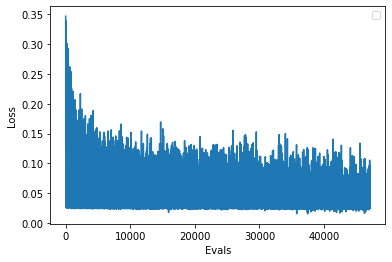

In [16]:
from source.utils.plot_utils import plot_curve

p = np.array(l)[:,1]
p = p.astype(np.float32)
plot_curve(p, 1, color='')

In [ ]:
from ..